In [112]:
from __future__ import print_function

import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import scipy.optimize
import scipy.io
import scipy.misc

from scipy.spatial.distance import cdist
from itertools import izip

from IPython import display
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('classic')
mpl.rcParams['axes.xmargin'] = 0.0
mpl.rcParams['axes.ymargin'] = 0.0

%matplotlib notebook

In [2]:
data = scipy.io.loadmat ('ex7data2.mat')
X = data['X']
K = 3
initial_centroids = np.array ([[3., 3.], [6., 2.], [8., 5.]])

In [3]:
def findClosestCentroids (X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    
    dists = cdist (X, centroids)
    idx = dists.argmin (axis=1)
    return (idx.reshape ((-1, 1)))

In [4]:
idx = findClosestCentroids (X, initial_centroids)

print ('Closest centroids for the first 3 examples:')
print (idx[:3].flatten ())
print ('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


In [5]:
def computeCentroids (X, idx, K):
    m, n = X.shape
    centroids = np.zeros ((K, n))
    
    for i in range (K):
        centroids[i] = np.mean (X[(idx == i).flatten (), :], axis=0)
        
    return (centroids)

In [6]:
centroids = computeCentroids (X, idx, K)

print ('Centroids computed after initial finding of closest centroids:')
print (centroids)
print ()
print ('(centroids should be')
print ('    [ 2.428301 3.157924 ]')
print ('    [ 5.813503 2.633656 ]')
print ('    [ 7.119387 3.616684 ])')

Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(centroids should be
    [ 2.428301 3.157924 ]
    [ 5.813503 2.633656 ]
    [ 7.119387 3.616684 ])


In [7]:
data = scipy.io.loadmat ('ex7data2.mat')
X = data['X']
K = 3
max_iters = 10

initial_centroids = np.array ([[3., 3.], [6., 2.], [8., 5.]])

In [146]:
def plotProgressKMeans (fig, ax, X, centroids, previous, idx, K, i):
    fig, ax = plotDataPoints (fig, ax, X, idx, K)
    ax.scatter (centroids[:, 0], centroids[:, 1], 
                marker='x', s=150, lw=2, color='k')
    for i in range (centroids.shape[0]):
        ax.plot ([centroids[i, 0], previous[i, 0]],
                 [centroids[i, 1], previous[i, 1]])
    return (fig, ax)
    
def plotDataPoints (fig, ax, X, idx, K):
    ax.scatter (X[:, 0], X[:, 1], 
                edgecolors='None', c=idx, cmap=plt.cm.hsv)
    return (fig, ax)
    
def runKMeans (X, initial_centroids, max_iters, 
              plot_progress=False, log=False, pause=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    if (plot_progress):
        fig = plt.figure ()
        ax = fig.add_subplot (111)
        ax.grid ()
    
    for i in range (max_iters):
        if log:
            print ('K-Means iteration {0}/{1}'.format (i+1, max_iters))
        
        idx = findClosestCentroids (X, centroids)
        if (plot_progress):
            fig, ax = plotProgressKMeans (
                fig, ax, X, centroids, previous_centroids, idx, K, i)
            fig.canvas.draw ()
        previous_centroids = centroids
        centroids = computeCentroids (X, idx, K)
        if pause:
            raw_input ('Press Enter to continue...')
        
    return (centroids, idx)

<IPython.core.display.Javascript object>


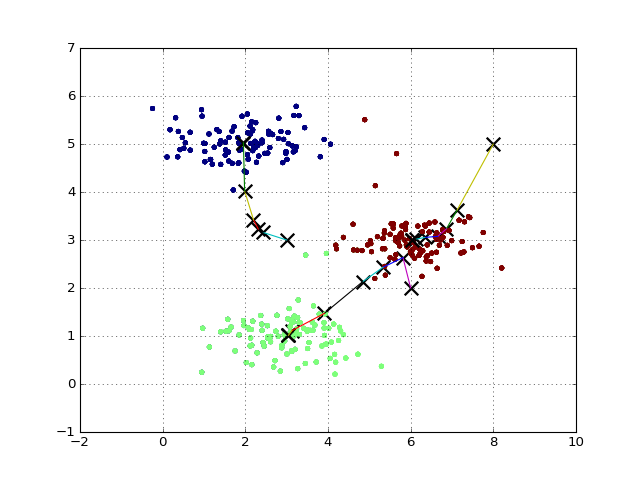

K-Means iteration 1/10
Press Enter to continue...
K-Means iteration 2/10
Press Enter to continue...
K-Means iteration 3/10
Press Enter to continue...
K-Means iteration 4/10
Press Enter to continue...
K-Means iteration 5/10
Press Enter to continue...
K-Means iteration 6/10
Press Enter to continue...
K-Means iteration 7/10
Press Enter to continue...
K-Means iteration 8/10
Press Enter to continue...
K-Means iteration 9/10
Press Enter to continue...
K-Means iteration 10/10
Press Enter to continue...


In [9]:
centroids, idx = runKMeans (X, initial_centroids, max_iters,
                            plot_progress=True)

In [10]:
print ('Running K-Means clustering on pixels from an image.')

A = scipy.misc.imread ('bird_small.png').astype ('double') / 255.
img_size = A.shape
X = A.reshape ((-1, 3))

Running K-Means clustering on pixels from an image.


In [11]:
def kMeansInitCentroids (X, K):
    m = X.shape[0]
    idx = np.random.choice (np.arange (m), size=K, replace=False)
    return (X[idx, :])

In [12]:
K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids (X, K)
centroids, idx = runKMeans (X, initial_centroids, max_iters)

K-Means iteration 1/10
Press Enter to continue...
K-Means iteration 2/10
Press Enter to continue...
K-Means iteration 3/10
Press Enter to continue...
K-Means iteration 4/10
Press Enter to continue...
K-Means iteration 5/10
Press Enter to continue...
K-Means iteration 6/10
Press Enter to continue...
K-Means iteration 7/10
Press Enter to continue...
K-Means iteration 8/10
Press Enter to continue...
K-Means iteration 9/10
Press Enter to continue...
K-Means iteration 10/10
Press Enter to continue...


In [13]:
X_recovered = centroids[idx.flatten (), :]
A_recovered = X_recovered.reshape (img_size)

<IPython.core.display.Javascript object>


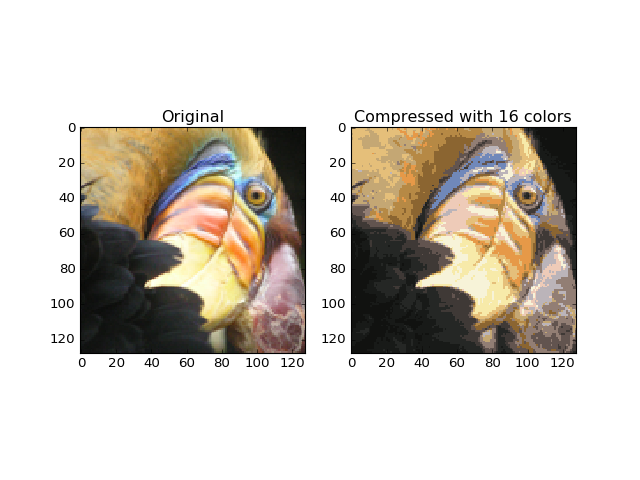

In [143]:
fig, axs = plt.subplots(ncols=2, nrows=1)
axs[0].imshow (A, interpolation='nearest')
axs[0].set_title ('Original')
axs[1].imshow (A_recovered, interpolation='nearest')
axs[1].set_title ('Compressed with {0} colors'.format (K))

## PCA Excercises

<IPython.core.display.Javascript object>


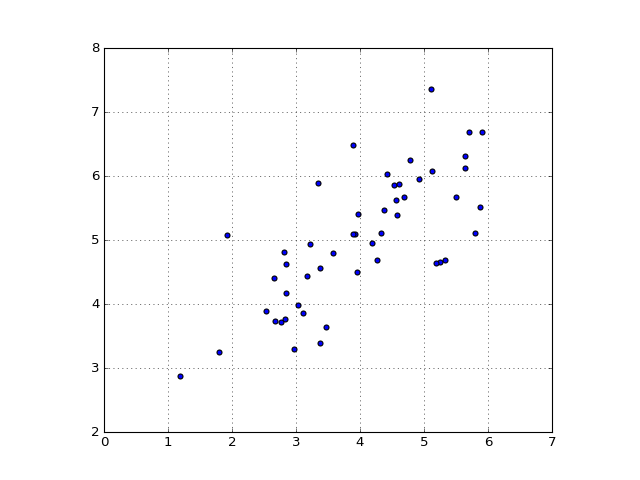

In [15]:
data = scipy.io.loadmat ('ex7data1.mat')
X = data['X']

fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (X[:, 0], X[:, 1], marker='o', c='b')
ax.grid ()
ax.set_aspect ('equal')

In [16]:
def featureNormalize (X):
    X_norm = X.copy ()
    mu = np.mean (X, axis=0)
    sigma = np.std (X, axis=0, ddof=1)
    X_norm = (X_norm - mu) / sigma
        
    return (X_norm, mu, sigma)

def PCA (X):
    m, n = X.shape
    
    Sigma = 1./m * X.T.dot (X)
    U, S, V = np.linalg.svd (Sigma)
    return (U, S, V)

In [17]:
X_norm, mu, sigma = featureNormalize (X)
U, S, V = PCA (X_norm)

<IPython.core.display.Javascript object>


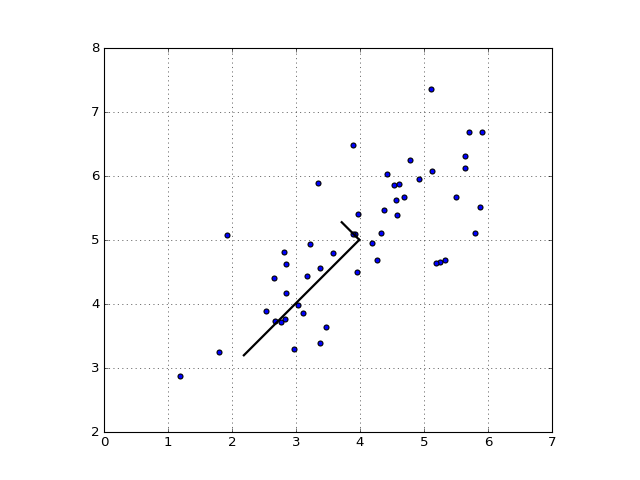

In [18]:
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (X[:, 0], X[:, 1], marker='o', c='b')
dir0 = np.vstack ((mu, mu + 1.5 * S[0] * U[:, 0]))
dir1 = np.vstack ((mu, mu + 1.5 * S[1] * U[:, 1]))
ax.plot (dir0[:, 0], dir0[:, 1], color='k', lw=2)
ax.plot (dir1[:, 0], dir1[:, 1], color='k', lw=2)
ax.grid ()
ax.set_aspect ('equal')

In [19]:
print ('Top Eigenvector:')
print ('U[:, 0] = {0:.6f} {1:.6f}'.format (U[0, 0], U[1, 0]))
print ('(you should expect to see -0.707107 -0.707107)')

Top Eigenvector:
U[:, 0] = -0.707107 -0.707107
(you should expect to see -0.707107 -0.707107)


<IPython.core.display.Javascript object>


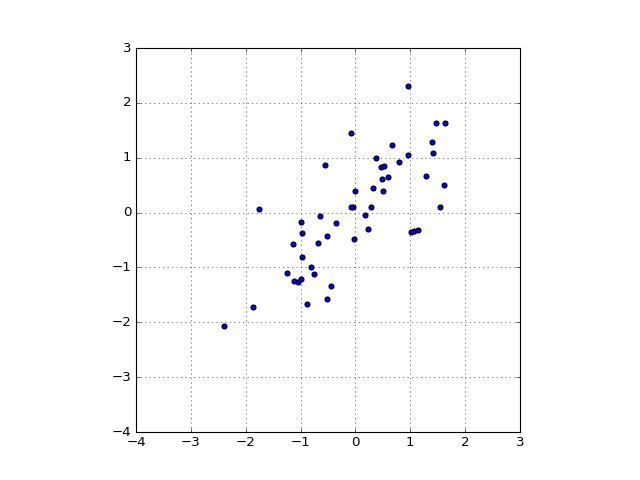

(-4, 3)

In [20]:
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (X_norm[:, 0], X_norm[:, 1], marker='o', c='b')
ax.set_aspect ('equal')
ax.grid ()
ax.set_xlim (-4, 3)
ax.set_ylim (-4, 3)

In [21]:
def projectData (X, U, K):
    return (X.dot (U[:, :K]))

def recoverData (Z, U, K):
    return (Z.dot (U[:, :K].T))

In [22]:
K = 1
Z = projectData (X_norm, U, K)
X_rec = recoverData (Z, U, K)

<IPython.core.display.Javascript object>


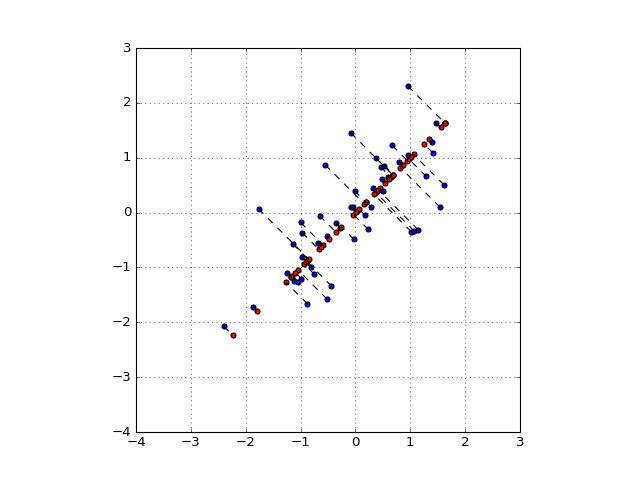

In [23]:
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (X_norm[:, 0], X_norm[:, 1], marker='o', c='b')
ax.scatter (X_rec[:, 0], X_rec[:, 1], marker='o', c='r')
for x0, x1 in izip (X_norm, X_rec):
    line_temp = np.vstack ((x0, x1))
    ax.plot (line_temp[:, 0], line_temp[:, 1], ls='--', color='k')
ax.set_xlim (-4, 3)
ax.set_ylim (-4, 3)
ax.set_aspect ('equal')
ax.grid ()


In [24]:
data = scipy.io.loadmat ('ex7faces.mat')
X = data['X']

In [97]:
def displayData (X, img_size, per_img_norm=False, grid_size=10):
    n_samples = int (grid_size**2)
    X_sample = X[:n_samples, :]
    
    fig = plt.figure (figsize=(0.5*grid_size, 0.5*grid_size))
    gs = gridspec.GridSpec (grid_size, grid_size, 
                            wspace=0., hspace=0., 
                            left=0., right=1., 
                            bottom=0., top=1.)
    
    for i, img in enumerate (X_sample):
        ax = plt.subplot (gs[i])
        if per_img_norm:
            ax.imshow (img.reshape (img_size).T, 
                       cmap='Greys_r', 
                       interpolation='nearest', aspect='equal')
        else:
            ax.imshow (img.reshape (img_size).T, 
                       cmap='Greys_r', 
                       vmin=X_sample.min (), 
                       vmax=X_sample.max (), 
                       interpolation='nearest', aspect='equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

<IPython.core.display.Javascript object>


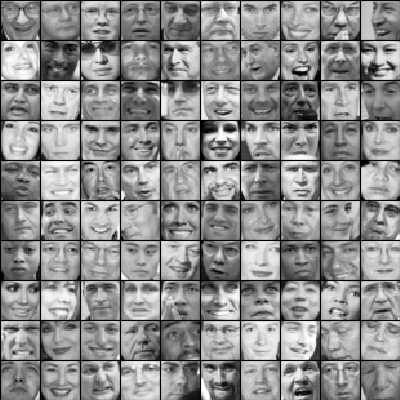

In [98]:
displayData (X, (32, 32), grid_size=10)

In [86]:
X_norm, mu, sigma = featureNormalize (X)
U, S, V = PCA (X_norm)

First 36 Eigenvectors


<IPython.core.display.Javascript object>


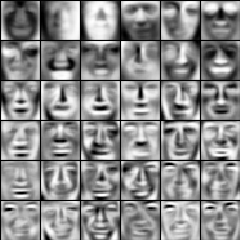

In [99]:
print ('First 36 Eigenvectors')
displayData (U.T, (32, 32), per_img_norm=True, grid_size=6)

In [101]:
K = 100
Z = projectData (X_norm, U, K)
X_rec = recoverData (Z, U, K)

print ('The projected data has a size of:')
print (Z.shape)

The projected data has a size of:
(5000, 100)


Original Faces


<IPython.core.display.Javascript object>


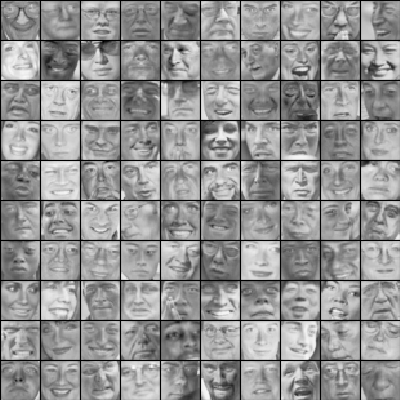

Recovered Faces:


<IPython.core.display.Javascript object>


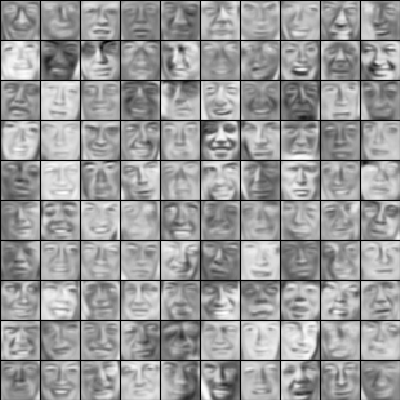

In [103]:
print ('Original Faces')
displayData (X_norm, (32, 32), per_img_norm=False, grid_size=10)

print ('Recovered Faces:')
displayData (X_rec, (32, 32), per_img_norm=False, grid_size=10)

In [147]:
A = scipy.misc.imread ('bird_small.png').astype ('double') / 255.
img_size = A.shape
X = A.reshape ((-1, 3))

In [148]:
K = 16
max_iters = 100

initial_centroids = kMeansInitCentroids (X, K)
centroids, idx = runKMeans (X, initial_centroids, max_iters)

<IPython.core.display.Javascript object>


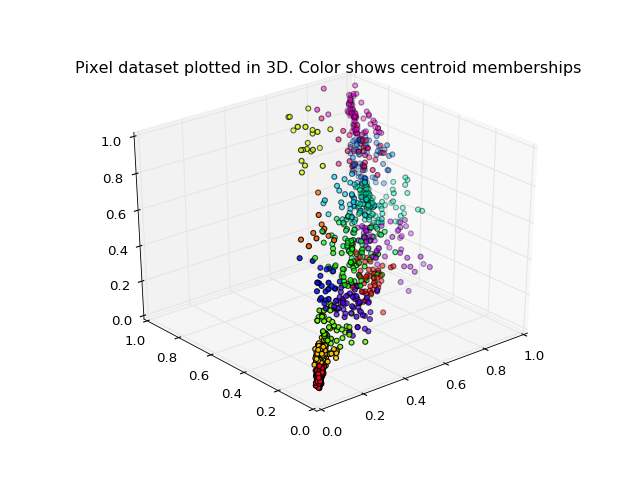

In [149]:
np.random.seed (10)
sample_idx = np.random.choice (X.shape[0], size=1000)
cmap = plt.cm.hsv

fig = plt.figure ()
ax = fig.add_subplot (111, projection='3d')
ax.scatter (X[sample_idx, 0], X[sample_idx, 1], X[sample_idx, 2], 
            c=idx[sample_idx], cmap=cmap)
ax.view_init(elev=30, azim=230)
ax.set_xlim (0, 1)
ax.set_ylim (0, 1)
ax.set_zlim (0, 1)
ax.set_title ('Pixel dataset plotted in 3D. Color shows centroid memberships')

In [150]:
X_norm, mu, sigma = featureNormalize (X)
U, S, V = PCA (X_norm)
Z = projectData (X_norm, U, 2)

<IPython.core.display.Javascript object>


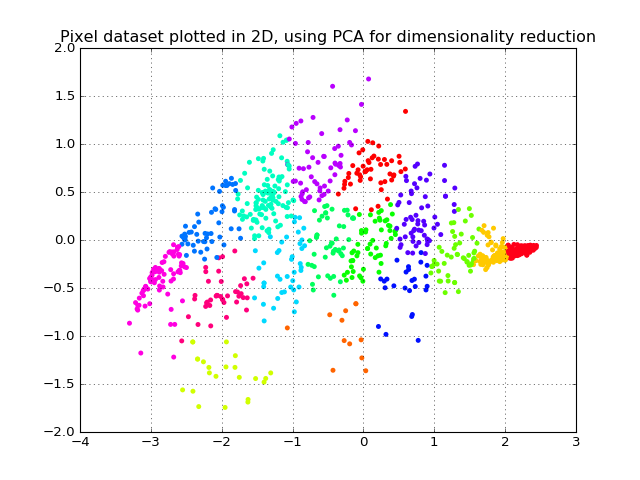

In [151]:
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.grid ()
fig, ax = plotDataPoints (fig, ax, Z[sample_idx, :], idx[sample_idx], K)
ax.set_title ('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')